In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from vitrocal.datasets import catalog
from vitrocal.preprocessors import StandardPreprocessor
from vitrocal.detectors import DerivativeDetector, StandardExtractor
from vitrocal.analyzers import StandardAnalyzer

In [2]:
# to load actual data

datacatalog = catalog.DataCatalog()
df = datacatalog.load('figi_output')
df

,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,39
0,,,,,,,,,,,,,,,,,,,,,
1,47.495,61.280,59.276,75.693,84.031,41.983,66.076,59.253,53.888,32.671,...,25.147,38.402,24.366,43.832,17.657,23.093,50.058,45.176,53.635,40.176
2,47.265,57.431,59.278,74.931,82.802,41.358,65.624,58.884,54.345,32.981,...,23.904,34.975,23.712,43.156,17.453,22.211,39.166,41.127,53.183,39.826
3,56.049,74.070,83.314,93.659,102.790,50.777,81.108,70.588,60.616,59.314,...,31.707,69.203,32.601,52.240,18.394,28.018,45.172,46.354,58.238,43.803
4,48.204,66.798,63.805,78.763,86.049,42.824,72.048,61.462,55.116,41.583,...,27.820,47.455,28.712,45.012,20.011,25.069,39.040,44.358,56.341,42.438
5,48.065,67.110,61.101,78.803,85.314,42.220,67.580,60.525,54.818,40.878,...,26.817,46.089,26.544,44.081,19.111,24.560,39.001,43.727,55.202,40.670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,49.973,83.843,58.722,93.982,67.613,49.379,50.636,58.728,50.285,33.754,...,37.834,76.683,28.585,47.538,23.046,37.532,38.947,56.826,61.812,48.937
141,48.382,65.126,57.273,89.004,63.084,45.017,48.304,54.927,47.892,30.774,...,29.909,66.643,23.591,43.656,21.037,27.535,33.458,41.895,52.152,43.520
142,47.989,58.359,57.150,87.617,61.206,44.511,47.430,54.823,47.675,30.117,...,29.272,51.342,23.008,43.022,20.383,26.072,33.410,39.689,49.891,42.146


In [3]:
preprocessor = StandardPreprocessor(
    frames_per_second=1/2.5, 
    bleach_period=60,
    filter_frequency=.15, 
    baseline_threshold=10, 
    window_size=60)

data = preprocessor.drop_frames(df)
data

,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,39
0,55.142,75.732,64.962,100.078,90.747,54.019,75.160,68.550,57.585,38.675,...,29.671,90.389,26.490,47.910,21.120,26.170,43.312,55.531,57.821,42.425
1,51.588,63.355,62.276,87.766,79.942,46.977,65.096,63.763,56.094,35.545,...,27.474,44.979,24.599,45.754,19.379,23.763,36.456,45.277,54.790,39.835
2,51.594,66.955,61.373,87.367,80.476,47.129,64.026,63.453,54.565,33.630,...,27.860,55.044,23.978,46.296,18.581,25.478,41.262,55.681,54.780,40.533
3,51.203,63.301,60.379,87.007,78.708,45.681,63.848,62.737,54.987,33.657,...,27.568,85.626,24.070,45.945,18.497,24.627,40.144,48.491,54.185,39.724
4,50.695,59.682,61.308,85.279,77.439,44.705,62.664,61.638,55.056,33.842,...,26.765,46.879,23.734,45.000,18.946,23.319,36.480,44.505,53.121,39.170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,49.973,83.843,58.722,93.982,67.613,49.379,50.636,58.728,50.285,33.754,...,37.834,76.683,28.585,47.538,23.046,37.532,38.947,56.826,61.812,48.937
115,48.382,65.126,57.273,89.004,63.084,45.017,48.304,54.927,47.892,30.774,...,29.909,66.643,23.591,43.656,21.037,27.535,33.458,41.895,52.152,43.520
116,47.989,58.359,57.150,87.617,61.206,44.511,47.430,54.823,47.675,30.117,...,29.272,51.342,23.008,43.022,20.383,26.072,33.410,39.689,49.891,42.146
117,49.636,70.435,57.216,94.956,66.055,46.716,48.508,56.477,48.516,31.269,...,31.733,77.478,25.891,44.337,21.769,29.792,34.021,44.291,53.210,44.608


In [4]:
preprocessor.filter(data)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,54.952110,62.479617,68.682971,72.990138,73.388711,71.216221,69.711624,68.571408,67.702793,69.795463,...,46.158317,46.732267,44.247454,40.888669,38.760773,39.001302,41.641456,44.174014,44.535345,42.728039
1,51.484055,57.188354,62.169668,65.499926,65.420321,63.325654,62.106269,61.345183,60.380102,61.251407,...,35.205238,34.855396,34.345954,33.680718,32.968806,33.700358,36.354905,39.221542,40.564371,39.923404
2,51.520072,57.466881,62.373337,65.593241,65.497490,63.355342,62.109928,61.464262,60.840618,62.489152,...,38.214330,37.826562,36.789257,35.621126,34.901534,36.057824,39.258937,42.053483,42.451043,40.648576
3,51.152741,56.671460,61.486916,64.766056,64.740139,62.809391,61.937961,61.778339,61.790239,64.297164,...,42.886990,43.561332,41.260413,38.062272,35.952350,36.059187,38.388799,40.727536,41.329189,40.018378
4,50.611744,55.809800,60.510734,63.649925,63.443169,61.334893,60.194620,59.611388,58.872163,59.961511,...,35.029446,34.733122,34.111134,33.311622,32.546759,33.248344,35.841667,38.592953,39.861695,39.266784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,50.111826,57.654663,62.398533,64.348786,62.818621,59.617937,57.730104,57.159812,57.217190,59.465234,...,45.022545,45.552082,43.783312,41.631799,40.692550,41.686558,44.496452,47.657044,49.363004,49.115721
115,48.498040,53.964785,58.205341,60.252916,58.792581,55.802026,54.143978,53.710654,53.815114,55.985386,...,38.119935,38.750484,37.437020,35.650587,34.516296,34.898862,37.118183,40.079214,42.484690,43.680346
116,48.099043,52.830751,56.918167,59.011461,57.585176,54.678786,53.060317,52.545675,52.363253,53.964532,...,34.777356,34.987590,34.279543,33.371993,32.712334,33.336450,35.636972,38.547101,40.937919,42.236038
117,49.775282,55.842242,60.419695,62.664129,61.084247,57.703417,55.718248,55.119280,55.162471,57.399697,...,41.111449,42.096242,40.377929,37.920443,36.401673,36.591783,38.677529,41.533020,43.796396,44.828350


In [4]:
baseline = preprocessor.baseline(data)
baseline

,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,39
0,55.1420,75.7320,64.9620,100.0780,90.7470,54.0190,75.1600,68.5500,57.5850,38.6750,...,29.6710,90.3890,26.4900,47.9100,21.1200,26.1700,43.3120,55.5310,57.8210,42.4250
1,51.9434,64.5927,62.5446,88.9972,81.0225,47.6812,66.1024,64.2417,56.2431,35.8580,...,27.6937,49.5200,24.7881,45.9696,19.5531,24.0037,37.1416,46.3024,55.0931,40.0940
2,51.5892,64.0750,61.5536,87.4468,80.0488,47.0074,64.2400,63.5150,54.8708,34.0130,...,27.5512,46.9920,24.1022,45.8624,18.7406,24.1060,37.4172,47.3278,54.7820,39.9746
3,51.3185,63.3172,60.6772,87.1150,79.0782,46.0698,63.9014,62.9518,54.6916,33.6381,...,27.5022,47.9985,24.0056,45.8113,18.5222,24.0222,37.5624,46.2412,54.3635,39.7573
4,50.8982,61.1296,60.7506,85.9702,77.9466,45.0954,63.1376,62.0776,54.7338,33.6408,...,27.0486,45.7390,23.8316,45.3016,18.5306,23.4966,36.4656,44.8138,53.5466,39.3916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,47.7630,55.3413,56.4689,88.0378,62.2330,43.6778,48.2202,55.6294,48.6328,31.2258,...,27.9075,45.3635,22.3928,42.9140,19.4122,24.1900,32.4981,39.3308,49.4757,39.9566
115,47.7630,55.3413,56.4746,88.0378,62.2330,43.6778,48.2202,55.3912,48.5974,31.2258,...,27.9611,45.3635,22.4219,42.9140,19.4122,24.1900,32.4981,39.3308,49.4757,39.9566
116,47.8053,55.6173,56.6783,88.0378,62.2330,43.8584,48.1614,55.2921,48.5605,31.2258,...,27.9611,45.3635,22.4658,42.9140,19.4122,24.1900,32.4981,39.3308,49.4757,39.9842
117,47.8053,55.6173,56.6783,88.0378,62.2330,43.8584,48.1614,55.2921,48.5253,31.1661,...,27.9611,45.3635,22.4658,42.9140,19.4122,24.1900,32.4981,39.3308,49.4757,39.9842


In [5]:
d_f = preprocessor.compute_fluoresence_change(data, baseline)

In [6]:
# alternatively:
d_f = preprocessor.preprocess(df)
d_f

,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,39
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.684206,-1.916161,-0.429454,-1.383414,-1.333580,-1.476892,-1.522486,-0.745155,-0.265099,-0.872888,...,-0.793321,-9.170032,-0.762866,-0.469006,-0.890396,-1.002762,-1.845909,-2.214572,-0.550160,-0.645982
2,0.009304,4.494733,-0.293403,-0.091255,0.533674,0.258683,-0.333126,-0.097615,-0.557309,-1.126040,...,1.120822,17.134831,-0.515306,0.945437,-0.851627,5.691529,10.275488,17.649669,-0.003651,1.396887
3,-0.225065,-0.025585,-0.491453,-0.123974,-0.468144,-0.843937,-0.083566,-0.341213,0.540120,0.056186,...,0.239254,78.393075,0.268271,0.291849,-0.136053,2.517671,6.872830,4.865358,-0.328345,-0.083758
4,-0.399228,-2.368084,0.917522,-0.804000,-0.651215,-0.865720,-0.750108,-0.708146,0.588667,0.598083,...,-1.048483,2.492403,-0.409540,-0.665760,2.241698,-0.755854,0.039489,-0.689073,-0.794822,-0.562556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,4.627013,51.501681,3.989984,6.751872,8.644931,13.052855,5.009934,5.570076,3.397296,8.096510,...,35.569291,69.041190,27.652638,10.775038,18.719156,55.155023,19.843929,44.482187,24.934059,22.475386
115,1.295982,17.680647,1.413733,1.097483,1.367442,3.066088,0.173786,-0.838039,-1.451518,-1.446880,...,6.966464,46.908858,5.214099,1.729039,8.369994,13.828028,2.953711,6.519572,5.409322,8.918176
116,0.384267,4.929581,0.832241,-0.477977,-1.650250,1.487970,-1.518644,-0.848403,-1.823499,-3.550910,...,4.688299,13.179098,2.413446,0.251666,5.000979,7.780074,2.806010,0.910737,0.839402,5.406636
117,3.829492,26.642250,0.948688,7.858215,6.141436,6.515514,0.719663,2.142982,-0.019165,0.330166,...,13.489813,70.793700,15.246285,3.315934,12.140819,23.158330,4.686120,12.611490,7.547746,11.564068


In [7]:
detector = DerivativeDetector(
    threshold=20
)

detected = detector.detect(d_f)
detected.head(15)

,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,39
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,False,False,False,True,True,True,False,False,False,False,...,False,True,False,False,True,False,True,False,False,False
7,False,False,False,True,True,True,False,False,False,False,...,False,True,False,False,True,False,True,False,False,True
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
9,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False


In [8]:
extractor = StandardExtractor(
    window = (3, 30), # this is in seconds
    frames_per_second=1/2.5, 
    threshold=20)

In [9]:
# calls DerivativeDetector.detect()
events = extractor.detect_and_extract(d_f)
events

With FPS = 0.4, a window of (3, 30) seconds captures 1 frame(s) before and 12 frame(s) after each event.


{1: [0     0.000000
  1    -0.684206
  2     0.009304
  3    -0.225065
  4    -0.399228
  5     0.122151
  6    -0.023675
  7     4.772239
  8     2.961078
  9     2.696625
  10    0.313640
  11   -0.424256
  12    0.347284
  13   -0.470848
  Name: 1, dtype: float64,
  9      2.696625
  10     0.313640
  11    -0.424256
  12     0.347284
  13    -0.470848
  14    28.786560
  15    23.642188
  16     8.784775
  17     1.092448
  18     0.402114
  19    -0.231917
  20    -0.456966
  21    19.553084
  22    13.795226
  Name: 1, dtype: float64,
  10     0.313640
  11    -0.424256
  12     0.347284
  13    -0.470848
  14    28.786560
  15    23.642188
  16     8.784775
  17     1.092448
  18     0.402114
  19    -0.231917
  20    -0.456966
  21    19.553084
  22    13.795226
  23     1.488952
  Name: 1, dtype: float64,
  14    28.786560
  15    23.642188
  16     8.784775
  17     1.092448
  18     0.402114
  19    -0.231917
  20    -0.456966
  21    19.553084
  22    13.795226
  23     1.4

In [10]:
analyzer = StandardAnalyzer(
    upper_decay_bound=.8,
    lower_decay_bound=.2
)

analyzer.analyze(events)

,roi,event,peak,upper,lower,decay
0,1,1,4.772239,2.961077903375348,0.3136403984613846,2.647438
1,1,2,28.786560,8.784774796500486,1.092448099329991,7.692327
2,1,3,28.786560,8.784774796500486,1.092448099329991,7.692327
3,1,4,28.786560,8.784774796500486,1.092448099329991,7.692327
4,1,5,19.553084,13.795226180547271,1.4889519763355898,12.306274
...,...,...,...,...,...,...
36,39,37,22.475386,8.918176221200005,NaN,NaN
37,39,38,22.475386,8.918176221200005,NaN,NaN
38,39,39,22.475386,8.918176221200005,NaN,NaN
39,39,40,22.475386,8.918176221200005,NaN,NaN


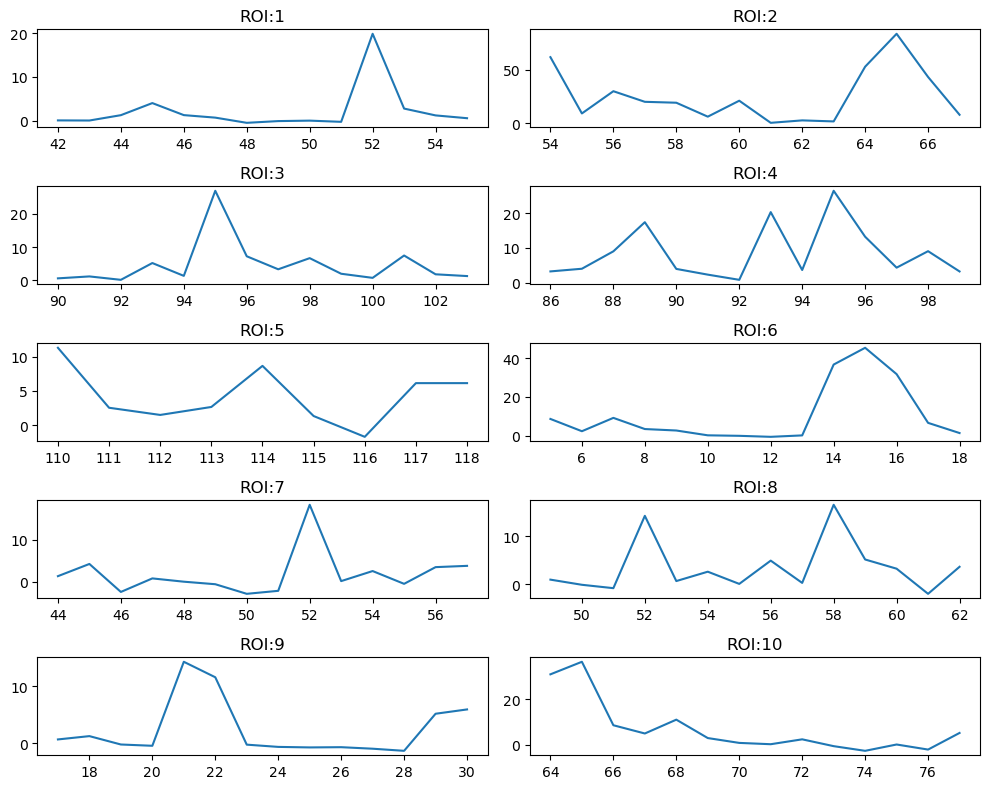

In [12]:
# examine a few events
arbitrary_events = range(1, 10+1)

fig, axs = plt.subplots(int(len(arbitrary_events)/2), 
                        ncols=2,
                        figsize=(10, 8))

for roi, ax in zip(arbitrary_events, axs.flat):

    to_plot = random.choice(events[roi])
    ax.plot(to_plot)
    ax.set_title('ROI:' + str(roi))

fig.tight_layout()


Text(0.5, 1.0, "'Average' Detected Event")

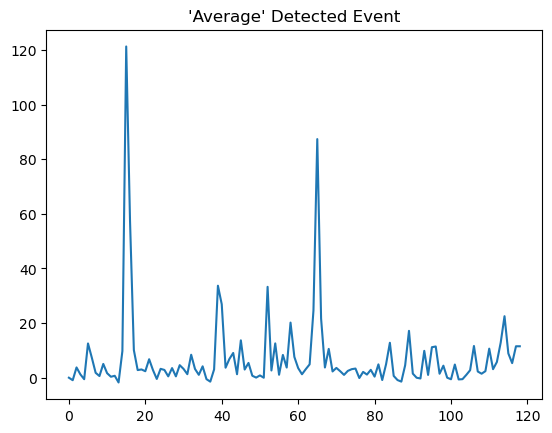

In [92]:
# want the index-wise average

combined = pd.Series()
for roi, values in events.items():
    for sequence in values:
        tmp = pd.Series(sequence)
        combined = pd.concat([combined, tmp], axis=1).agg("mean", axis=1)

plt.plot(combined.sort_index())
plt.title("'Average' Detected Event")